In [23]:
import seaborn as sn
import quandl
API_KEY = "yCev-u-joPYss-FULGkt"
quandl.ApiConfig.api_key = (API_KEY)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [43]:
from sklearn.metrics import  mean_squared_error
import math
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [25]:
def forecast_accuracy(forecast, actual):
    mse = mean_squared_error(actual, forecast)
    return math.sqrt(mse)

Let's retrieve the data

In [26]:
acotec_df = quandl.get('HKEX/06669')
acotec_df.head()

,Nominal Price,Net Change,Change (%),Bid,Ask,P/E(x),High,Low,Previous Close,Share Volume (000),Turnover (000),Lot Size
Date,,,,,,,,,,,,
2021-08-24,17.60,None,None,17.24,17.60,None,18.38,17.00,NaN,31056.0,552859.0,None
2021-08-25,18.86,None,None,18.86,18.88,None,19.14,17.20,17.60,8915.0,163877.0,None
2021-08-26,18.60,None,None,18.40,18.60,None,19.36,18.14,18.86,5249.0,97757.0,None
2021-08-27,18.10,None,None,18.10,18.20,None,18.70,18.10,18.60,1761.0,32177.0,None
2021-08-30,17.66,None,None,17.66,17.68,None,17.88,17.26,18.10,1820.0,32013.0,None


Let's try to predict the Nominal Price with time series

# ARIMA

ADF Test for Null Hypothesis

In [28]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.879595
p-value: 0.341720


p-value > 0.05 => Null hypothesis is not true.
Now, to find 'd'

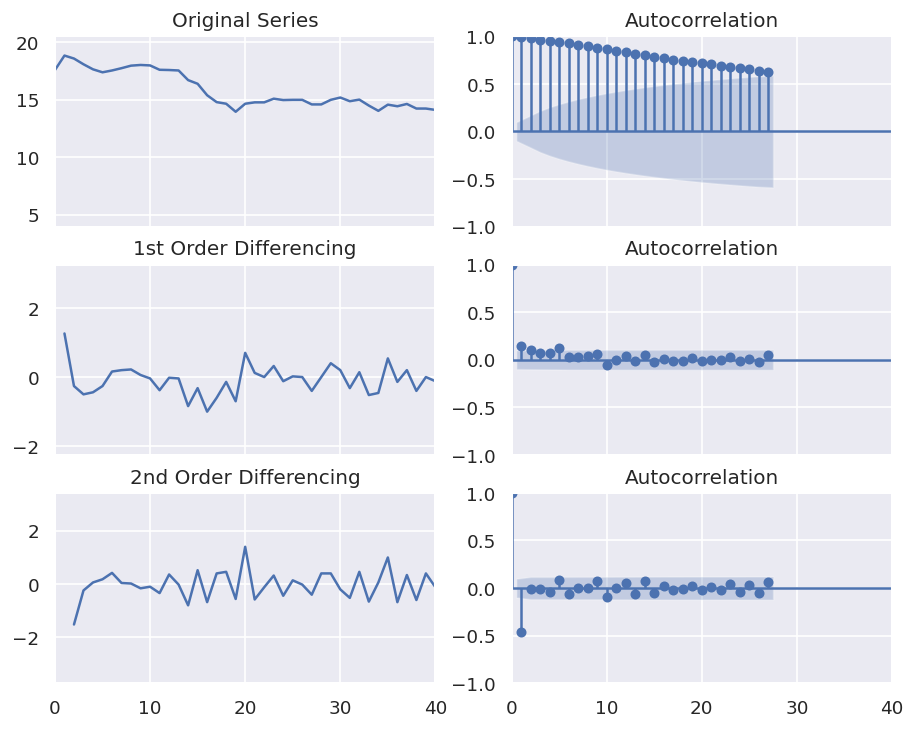

d=1, as the dataset becomes stationary at 1st order differencing

Now, to find AR(p)

/home/ananthNB/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


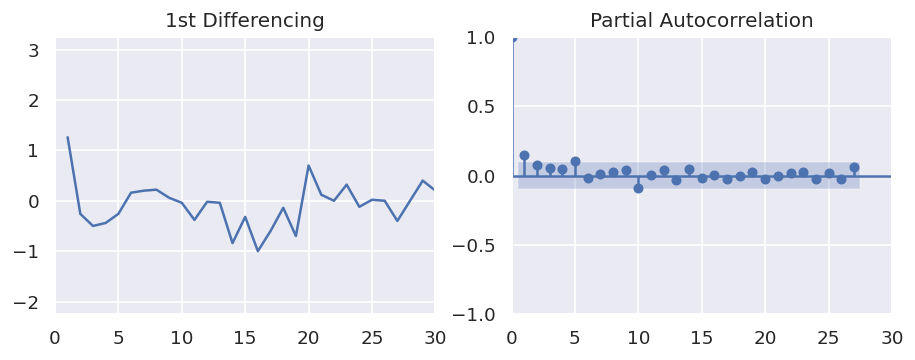

In [30]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,4))
axes[1].set_xlim([0, 30])
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

p = 1

Now, to find MA(q)

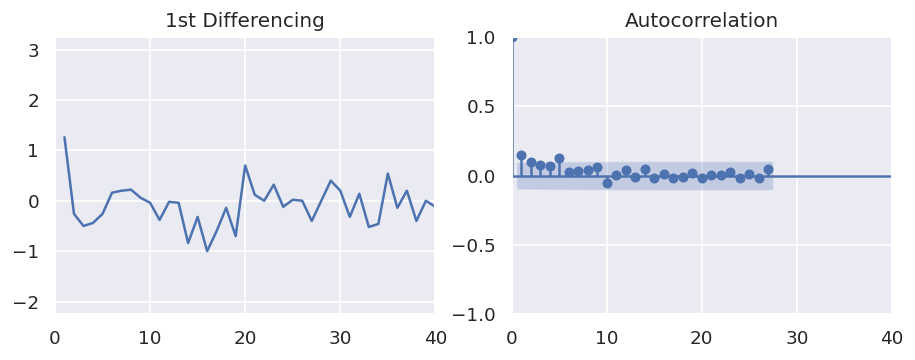

In [31]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
axes[1].set_xlim([0, 40])
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

q=1

Now, to create the model

In [32]:
from statsmodels.tsa.arima.model import ARIMA
train = df[:350]
test = df[350:]
# 1,1,1 ARIMA Model
model = ARIMA(train.value, order=(1,1,1))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  350
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -175.338
Date:                Wed, 19 Apr 2023   AIC                            356.676
Time:                        00:33:25   BIC                            368.241
Sample:                             0   HQIC                           361.280
                                - 350                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7945      0.122      6.505      0.000       0.555       1.034
ma.L1         -0.6767      0.152     -4.460      0.000      -0.974      -0.379
sigma2         0.1599      0.006     27.499      0.0

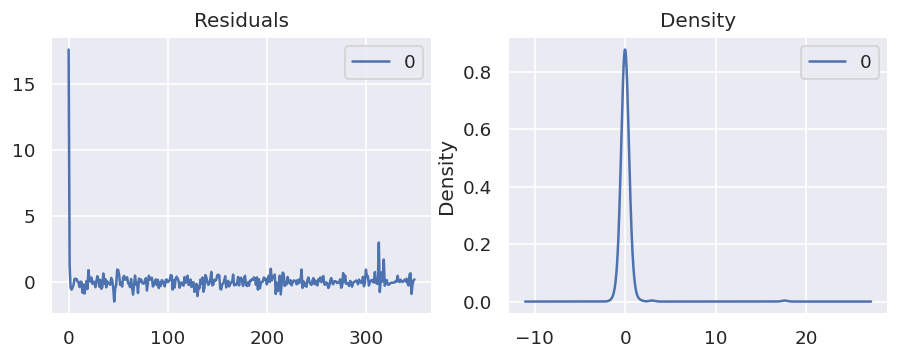

In [33]:
# Plot residual errors
residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

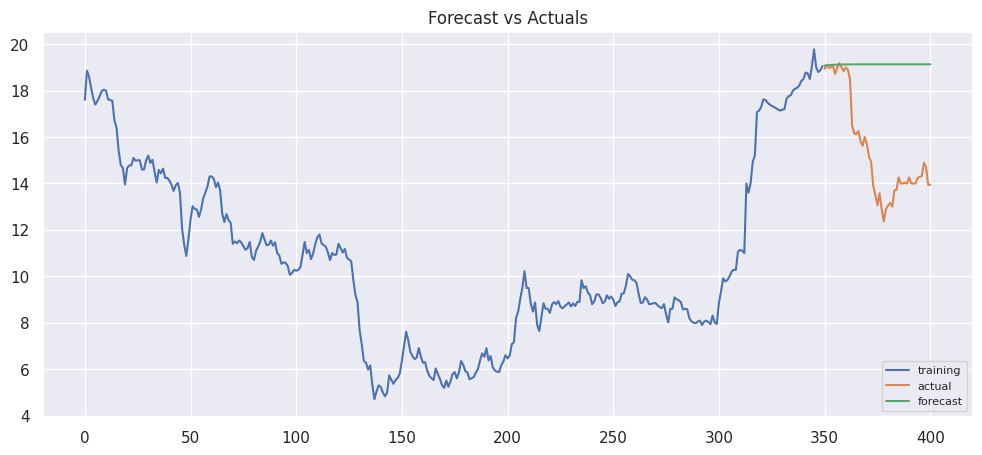

In [34]:
#Forecast
forecast = fitted.predict(start=350, end=400)
# print(forecast)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.value, label='training')
plt.plot(test.value, label='actual')
plt.plot(forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='lower right', fontsize=8)
plt.show()

Root Mean Squared Error (MSE)

In [35]:
print(forecast_accuracy(forecast,test.value))

4.26113755294209
